In [1]:
import pandas as pd
import os
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Standar Kelurahan Data Corona (5 Juli 2020 Pukul 09.00).csv")

In [3]:
df

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,ODP Meninggal,PDP,Masih Dirawat,Pulang dan Sehat,PDP Meninggal,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,98785,480,98157,148,18234,718,15512,2004,12295,584,7663,658,3390,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,12383,2,12322,59,5326,5,3761,1560,1690,172,377,28,1113,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,14966,202,14752,12,3425,151,3196,78,1946,20,1735,77,114,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,596,6,589,1,84,2,76,6,53,4,43,4,2,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,23,0,23,0,18,1,17,0,16,0,16,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3101021002,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,339,0,339,0,2,0,2,0,16,0,11,0,5,NaN
266,3173031008,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,88,0,88,0,12,2,9,1,2,0,2,0,0,NaN
267,3174021001,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,92,0,92,0,14,1,13,0,4,0,2,0,2,NaN
268,3173041001,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,177,1,176,0,17,0,14,3,7,0,2,0,5,NaN


In [4]:
df.drop(columns =['ID_KEL', 'ID_KEL.1','Nama_provinsi','nama_kelurahan','nama_kecamatan','Keterangan'] ,index = 0, inplace = True)

In [5]:
df

,nama_kota,ODP,Proses Pemantauan,Selesai Pemantauan,ODP Meninggal,PDP,Masih Dirawat,Pulang dan Sehat,PDP Meninggal,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation
1,BELUM DIKETAHUI,12383,2,12322,59,5326,5,3761,1560,1690,172,377,28,1113
2,LUAR DKI JAKARTA,14966,202,14752,12,3425,151,3196,78,1946,20,1735,77,114
3,JAKARTA BARAT,596,6,589,1,84,2,76,6,53,4,43,4,2
4,JAKARTA SELATAN,23,0,23,0,18,1,17,0,16,0,16,0,0
5,JAKARTA BARAT,758,3,754,1,76,5,68,3,79,1,50,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,KAB.ADM.KEP.SERIBU,339,0,339,0,2,0,2,0,16,0,11,0,5
266,JAKARTA BARAT,88,0,88,0,12,2,9,1,2,0,2,0,0
267,JAKARTA SELATAN,92,0,92,0,14,1,13,0,4,0,2,0,2
268,JAKARTA BARAT,177,1,176,0,17,0,14,3,7,0,2,0,5


In [6]:
df['nama_kota'].unique()

array(['BELUM DIKETAHUI', 'LUAR DKI JAKARTA', 'JAKARTA BARAT',
       'JAKARTA SELATAN', 'JAKARTA UTARA', 'JAKARTA TIMUR',
       'JAKARTA PUSAT', 'KAB.ADM.KEP.SERIBU'], dtype=object)

In [7]:
df.isna().sum()

nama_kota             0
ODP                   0
Proses Pemantauan     0
Selesai Pemantauan    0
ODP Meninggal         0
PDP                   0
Masih Dirawat         0
Pulang dan Sehat      0
PDP Meninggal         0
POSITIF               0
Dirawat               0
Sembuh                0
Meninggal             0
Self Isolation        0
dtype: int64

In [8]:
df_new = df[(df['nama_kota'] == "JAKARTA BARAT") | (df['nama_kota'] == "JAKARTA UTARA") | (df['nama_kota'] == "JAKARTA TIMUR") | (df['nama_kota'] == "JAKARTA SELATAN") | (df['nama_kota'] == "JAKARTA PUSAT") ]

In [9]:
df_new.reset_index(inplace = True)

In [10]:
df_new

,index,nama_kota,ODP,Proses Pemantauan,Selesai Pemantauan,ODP Meninggal,PDP,Masih Dirawat,Pulang dan Sehat,PDP Meninggal,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation
0,3,JAKARTA BARAT,596,6,589,1,84,2,76,6,53,4,43,4,2
1,4,JAKARTA SELATAN,23,0,23,0,18,1,17,0,16,0,16,0,0
2,5,JAKARTA BARAT,758,3,754,1,76,5,68,3,79,1,50,7,21
3,6,JAKARTA UTARA,607,2,604,1,181,2,177,2,46,0,34,7,5
4,7,JAKARTA BARAT,331,0,331,0,46,1,43,2,94,2,69,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,259,JAKARTA BARAT,66,0,66,0,10,0,9,1,4,1,3,0,0
257,260,JAKARTA SELATAN,205,0,205,0,22,0,20,2,19,2,12,1,4
258,266,JAKARTA BARAT,88,0,88,0,12,2,9,1,2,0,2,0,0
259,267,JAKARTA SELATAN,92,0,92,0,14,1,13,0,4,0,2,0,2


In [11]:
df_positif = df_new.groupby('nama_kota')['POSITIF'].sum()

In [12]:
df_positif = pd.DataFrame(df_positif)

In [13]:
df_positif.reset_index(inplace= True)

In [14]:
df_positif["id"] = ['ID3174','ID3173','ID3171','ID3172','ID3175'] 

In [15]:
ODP = df_new.groupby('nama_kota')['ODP'].sum().tolist()

In [16]:
ODP_meninggal = df_new.groupby('nama_kota')['ODP Meninggal'].sum().tolist()

In [17]:
df_positif["ODP"] = ODP


In [18]:
df_positif

,nama_kota,POSITIF,id,ODP
0,JAKARTA BARAT,1913,ID3174,15882
1,JAKARTA PUSAT,1864,ID3173,11882
2,JAKARTA SELATAN,1423,ID3171,15475
3,JAKARTA TIMUR,1823,ID3172,14437
4,JAKARTA UTARA,1618,ID3175,12814


In [19]:
p = df_new.groupby('nama_kota').agg({'ODP Meninggal':'sum','PDP':'sum','PDP Meninggal':'sum','Dirawat':'sum','Sembuh':'sum','Meninggal':'sum'})

In [20]:
df_positif = df_positif.merge(p, on = "nama_kota")

In [21]:
df_positif

,nama_kota,POSITIF,id,ODP,ODP Meninggal,PDP,PDP Meninggal,Dirawat,Sembuh,Meninggal
0,JAKARTA BARAT,1913,ID3174,15882,16,1912,121,73,1231,107
1,JAKARTA PUSAT,1864,ID3173,11882,15,1495,52,94,1107,113
2,JAKARTA SELATAN,1423,ID3171,15475,16,2294,70,73,908,114
3,JAKARTA TIMUR,1823,ID3172,14437,20,1929,78,79,1202,117
4,JAKARTA UTARA,1618,ID3175,12814,9,1831,44,72,1091,102


#### Visualitation Map

In [22]:
path = os.getcwd()
regency_geo =  path + '/JK_regencies.json'
regency_index = path + '/IDkota.csv'
regency_data = pd.read_csv(regency_index)


m = folium.Map(location=[-6.2, 106.90],tiles='OpenStreetMap', zoom_start=11)
folium.Choropleth(
    geo_data=regency_geo,
    name='choropleth',
    data=regency_data,
    columns=['id', 'POSITIF'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=2,
    legend_name='Positif'
).add_to(m)

m

In [23]:
kota = df_positif['nama_kota'].tolist()

In [24]:
kota

['JAKARTA BARAT',
 'JAKARTA PUSAT',
 'JAKARTA SELATAN',
 'JAKARTA TIMUR',
 'JAKARTA UTARA']

In [25]:
import random
r = lambda: random.randint(0,255)
print(r)

<function <lambda> at 0x000001A35C73FCA8>


In [26]:
from random import randint
color = '#{:06x}'.format(randint(0, 256**3))

In [27]:
random = []
for i in range (1,34):
    color = '#{:06x}'.format(randint(0, 256**3))
    random.append(color)


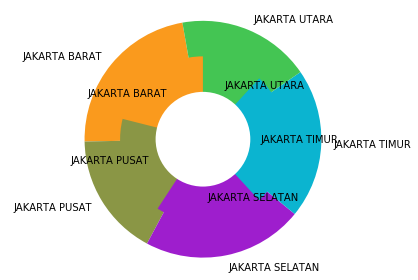

In [28]:
labels = kota
sizes = ODP

labels_vegefruit = kota
sizes_vegefruit = ODP_meninggal

colors = random
colors_vegefruit = random
 
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=100, frame=True)
smaller = plt.pie(sizes_vegefruit, labels=labels_vegefruit,
                  colors=colors_vegefruit, radius=0.7,
                  startangle=90, labeldistance=0.7)

centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()

plt.show()

In [29]:
barat = df_positif.loc[0,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
pusat = df_positif.loc[1,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
selatan = df_positif.loc[2,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
timur = df_positif.loc[3,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
utara = df_positif.loc[4,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()

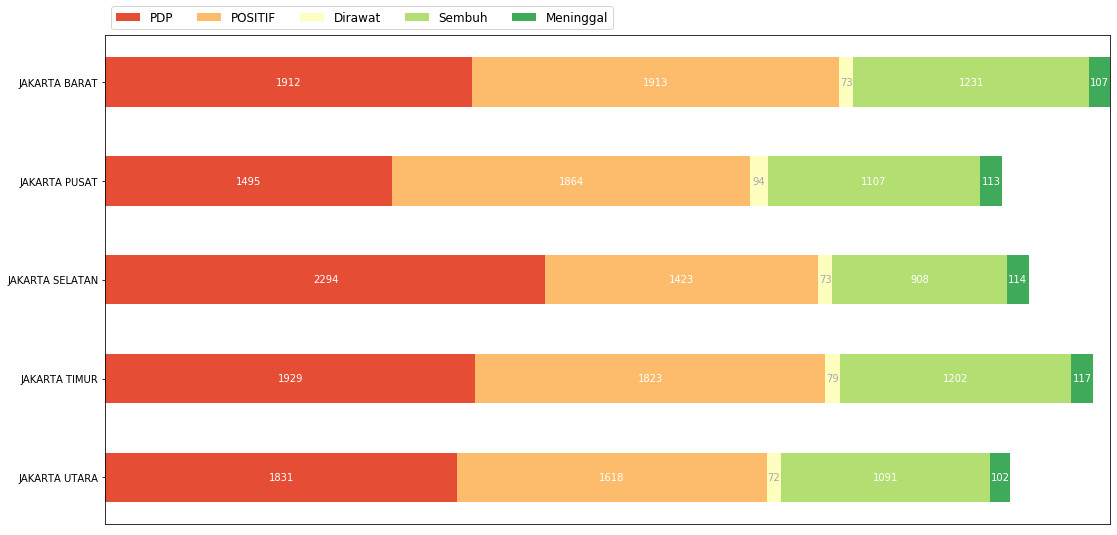

In [30]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['PDP','POSITIF','Dirawat','Sembuh','Meninggal']
results = {
    'JAKARTA BARAT': barat,
    'JAKARTA PUSAT': pusat,
    'JAKARTA SELATAN': selatan,
    'JAKARTA TIMUR': timur,
    'JAKARTA UTARA': utara,
    
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(18, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(results, category_names)
plt.show()

In [31]:
df_positif

,nama_kota,POSITIF,id,ODP,ODP Meninggal,PDP,PDP Meninggal,Dirawat,Sembuh,Meninggal
0,JAKARTA BARAT,1913,ID3174,15882,16,1912,121,73,1231,107
1,JAKARTA PUSAT,1864,ID3173,11882,15,1495,52,94,1107,113
2,JAKARTA SELATAN,1423,ID3171,15475,16,2294,70,73,908,114
3,JAKARTA TIMUR,1823,ID3172,14437,20,1929,78,79,1202,117
4,JAKARTA UTARA,1618,ID3175,12814,9,1831,44,72,1091,102


In [32]:
odp = df_positif['ODP'].tolist()
pdp = df_positif['PDP'].tolist()
positif = df_positif['POSITIF'].tolist()
sembuh = df_positif['Sembuh'].tolist()
meninggal = df_positif['Meninggal'].tolist()

In [33]:
df_positif['pres_ODP_meninggal']= df_positif['ODP Meninggal'] / df_positif['ODP'] * 100 
df_positif['pres_PDP_meninggal']= df_positif['PDP Meninggal'] / df_positif['PDP'] * 100 
df_positif['pres_Pos_meninggal']= df_positif['Meninggal'] / df_positif['POSITIF'] * 100 


In [34]:
df_positif

,nama_kota,POSITIF,id,ODP,ODP Meninggal,PDP,PDP Meninggal,Dirawat,Sembuh,Meninggal,pres_ODP_meninggal,pres_PDP_meninggal,pres_Pos_meninggal
0,JAKARTA BARAT,1913,ID3174,15882,16,1912,121,73,1231,107,0.100743,6.328452,5.593309
1,JAKARTA PUSAT,1864,ID3173,11882,15,1495,52,94,1107,113,0.126241,3.478261,6.062232
2,JAKARTA SELATAN,1423,ID3171,15475,16,2294,70,73,908,114,0.103393,3.051439,8.011244
3,JAKARTA TIMUR,1823,ID3172,14437,20,1929,78,79,1202,117,0.138533,4.043546,6.417992
4,JAKARTA UTARA,1618,ID3175,12814,9,1831,44,72,1091,102,0.070236,2.403058,6.304079


In [35]:
pres_df = df_positif.loc[:,["nama_kota","pres_ODP_meninggal",'pres_PDP_meninggal','pres_Pos_meninggal']]
pres_df.style.background_gradient(cmap = "Oranges")

,nama_kota,pres_ODP_meninggal,pres_PDP_meninggal,pres_Pos_meninggal
0,JAKARTA BARAT,0.100743,6.328452,5.593309
1,JAKARTA PUSAT,0.126241,3.478261,6.062232
2,JAKARTA SELATAN,0.103393,3.051439,8.011244
3,JAKARTA TIMUR,0.138533,4.043546,6.417992
4,JAKARTA UTARA,0.070236,2.403058,6.304079


In [36]:
barat_pres = df_positif.loc[0,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
pusat_pres = df_positif.loc[1,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
selatan_pres = df_positif.loc[2,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
timur_pres = df_positif.loc[3,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
utara_pres = df_positif.loc[4,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()

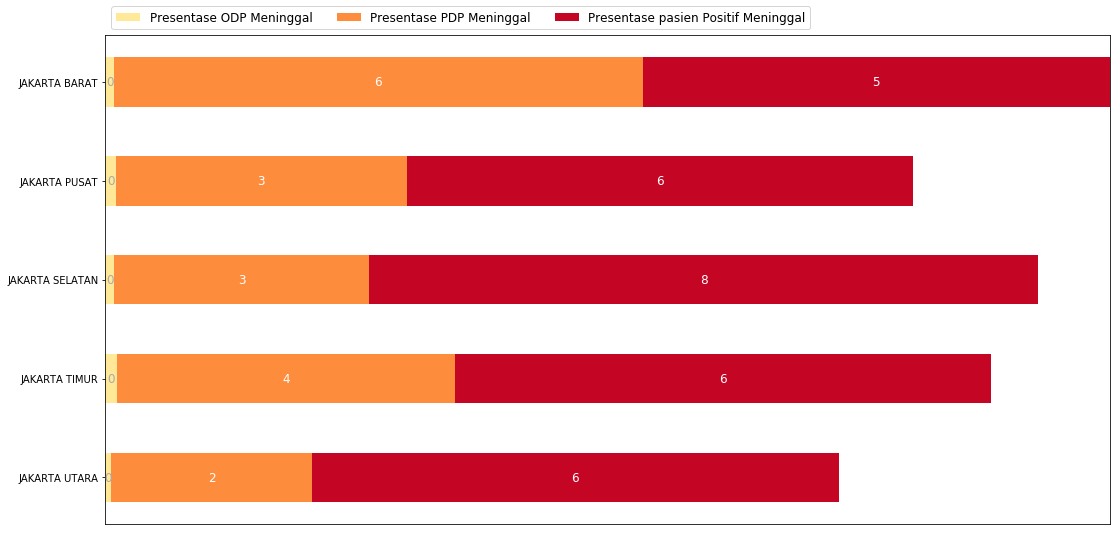

In [37]:
category_names = ['Presentase ODP Meninggal','Presentase PDP Meninggal','Presentase pasien Positif Meninggal']
results = {
    'JAKARTA BARAT': barat_pres,
    'JAKARTA PUSAT': pusat_pres,
    'JAKARTA SELATAN': selatan_pres,
    'JAKARTA TIMUR': timur_pres,
    'JAKARTA UTARA': utara_pres,
    
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('YlOrRd')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(18, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color,fontsize='large')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(results, category_names)
plt.show()